In [1]:
import warnings
warnings.filterwarnings("ignore")

## Importing Libraries

### Data Processing and Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Machine Learning Libraries

#### Data Splitting

In [3]:
from sklearn.model_selection import train_test_split

#### Data Pre-processing

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#### Sampling

In [5]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#### ML Algorithms

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Neural Networks

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import metrics
from keras.initializers import Constant

#### Metrics

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Storing Model

In [9]:
import pickle

## Loading Train and Test Data

In [100]:
train_data = pd.read_csv('data/Training Data.csv')
test_data = pd.read_csv('data/Test Data.csv')

In [11]:
train_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [12]:
test_data

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


## Exploratory Data Analysis

### Checking Data Type

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


We conclude that the dataset has no null values

### Data Visualization

In [14]:
def plot_hist(data1, data2, feature, labels):
    plt.hist([data1[feature], data2[feature]], bins=10, label=labels, density=True, stacked=True)
    plt.title("Defaults based on {}".format(feature))
    plt.legend()
    plt.xlabel(feature)
    plt.show()
    
def plot_pie(data, labels, title, axis=None, ax_index=None):
    if axis is not None and ax_index is not None:
        axis[ax_index % 13, ax_index // 13].pie(data, labels=labels, autopct='%1.1f%%')
        axis[ax_index % 13, ax_index // 13].set_title("Defaults based on {}".format(title))
    else:
        plt.pie(data, labels=labels, autopct='%1.1f%%')
        plt.title("Defaults based on {}".format(title))
        plt.show()

In [15]:
def get_defaults(data, feature, value, text=None):
    all_value = data[data[feature] == value]['Risk_Flag'].value_counts()
    print("Proportion of {} who default: {}".format(text or value, all_value[1]/(all_value[0] + all_value[1])))
    return all_value

In [16]:
risky_1 = train_data[train_data['Risk_Flag'] == 1].copy()
risky_0 = train_data[train_data['Risk_Flag'] == 0].copy()

In [17]:
flags = ['Risky', 'Safe']

#### Influence on Income on Risk factor

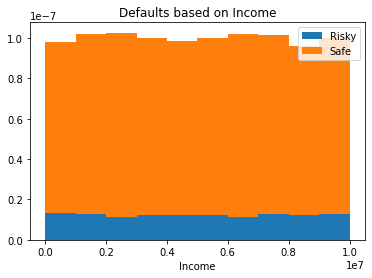

In [18]:
plot_hist(risky_1, risky_0, 'Income', flags)

#### Influence of Age on Risk Factor

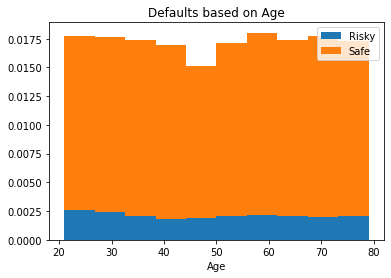

In [19]:
plot_hist(risky_1, risky_0, 'Age', flags)

#### Influence of Experience on Risk Factor

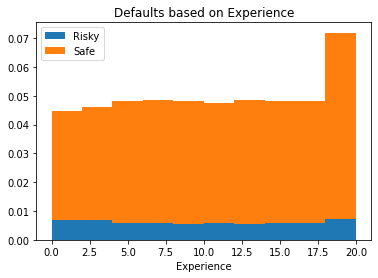

In [20]:
plot_hist(risky_1, risky_0, 'Experience', flags)

#### Influence of Job Years on Risk Factor

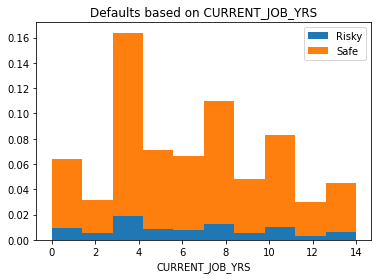

In [21]:
plot_hist(risky_1, risky_0, 'CURRENT_JOB_YRS', flags)

#### Influence of House Years on Risk Factor

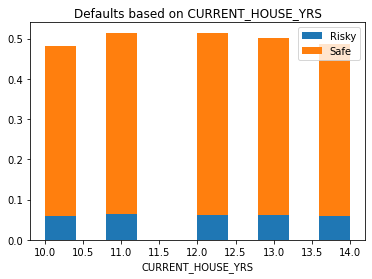

In [22]:
plot_hist(risky_1, risky_0, 'CURRENT_HOUSE_YRS', flags)

#### Influence of Gender on Risk Factor

In [23]:
train_data['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [24]:
all_singles = get_defaults(train_data, 'Married/Single', 'single')

Proportion of single who default: 0.1253358789421581


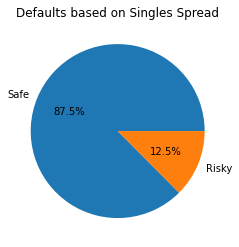

In [25]:
plot_pie(all_singles, flags[::-1], 'Singles Spread')

In [26]:
all_married = get_defaults(train_data, 'Married/Single', 'married')

Proportion of married who default: 0.10245646766169154


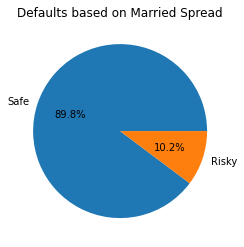

In [27]:
plot_pie(all_married, flags[::-1], 'Married Spread')

#### Influence of House Ownership on Risk Factor

In [28]:
train_data['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [29]:
all_rented = get_defaults(train_data, 'House_Ownership', 'rented')

Proportion of rented who default: 0.1255767621971729


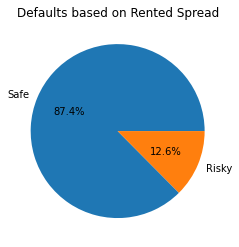

In [30]:
plot_pie(all_rented, flags[::-1], 'Rented Spread')

In [31]:
all_owned = get_defaults(train_data, 'House_Ownership', 'owned')

Proportion of owned who default: 0.08979718222635083


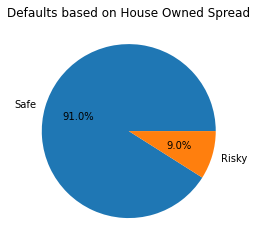

In [32]:
plot_pie(all_owned, flags[::-1], 'House Owned Spread')

In [33]:
all_noown = get_defaults(train_data, 'House_Ownership', 'norent_noown')

Proportion of norent_noown who default: 0.09952672605790645


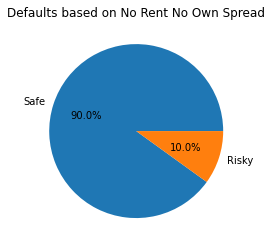

In [34]:
plot_pie(all_noown, flags[::-1], 'No Rent No Own Spread')

#### Influence of Car Ownership on Risk Factor

In [35]:
all_car = get_defaults(train_data, 'Car_Ownership', 'yes', 'Car Owners')

Proportion of Car Owners who default: 0.11098684210526316


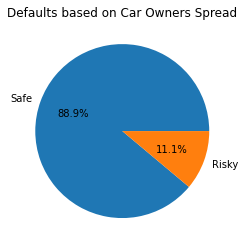

In [36]:
plot_pie(all_car, flags[::-1], 'Car Owners Spread')

In [37]:
no_car = get_defaults(train_data, 'Car_Ownership', 'no', 'Non Car Owners')

Proportion of Non Car Owners who default: 0.1281875


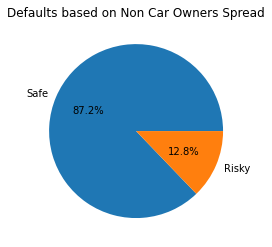

In [38]:
plot_pie(no_car, flags[::-1], 'Non Car Owners Spread')

#### Influence of Profession on Risk Factor

In [39]:
train_data['Profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

Proportion of Physician who default: 0.11918751049185831
Proportion of Statistician who default: 0.11557009989665863
Proportion of Web_designer who default: 0.10913470446544377
Proportion of Psychologist who default: 0.12189239332096476
Proportion of Computer_hardware_engineer who default: 0.12844378257632166
Proportion of Drafter who default: 0.1128941966784848
Proportion of Magistrate who default: 0.12002986746313235
Proportion of Fashion_Designer who default: 0.11538461538461539
Proportion of Air_traffic_controller who default: 0.1353910244271918
Proportion of Comedian who default: 0.11960448754516068
Proportion of Industrial_Engineer who default: 0.09866666666666667
Proportion of Mechanical_engineer who default: 0.11155836687751582
Proportion of Chemical_engineer who default: 0.11162343900096061
Proportion of Technical_writer who default: 0.134167468719923
Proportion of Hotel_Manager who default: 0.13538045577443028
Proportion of Financial_Analyst who default: 0.10315463518482679
P

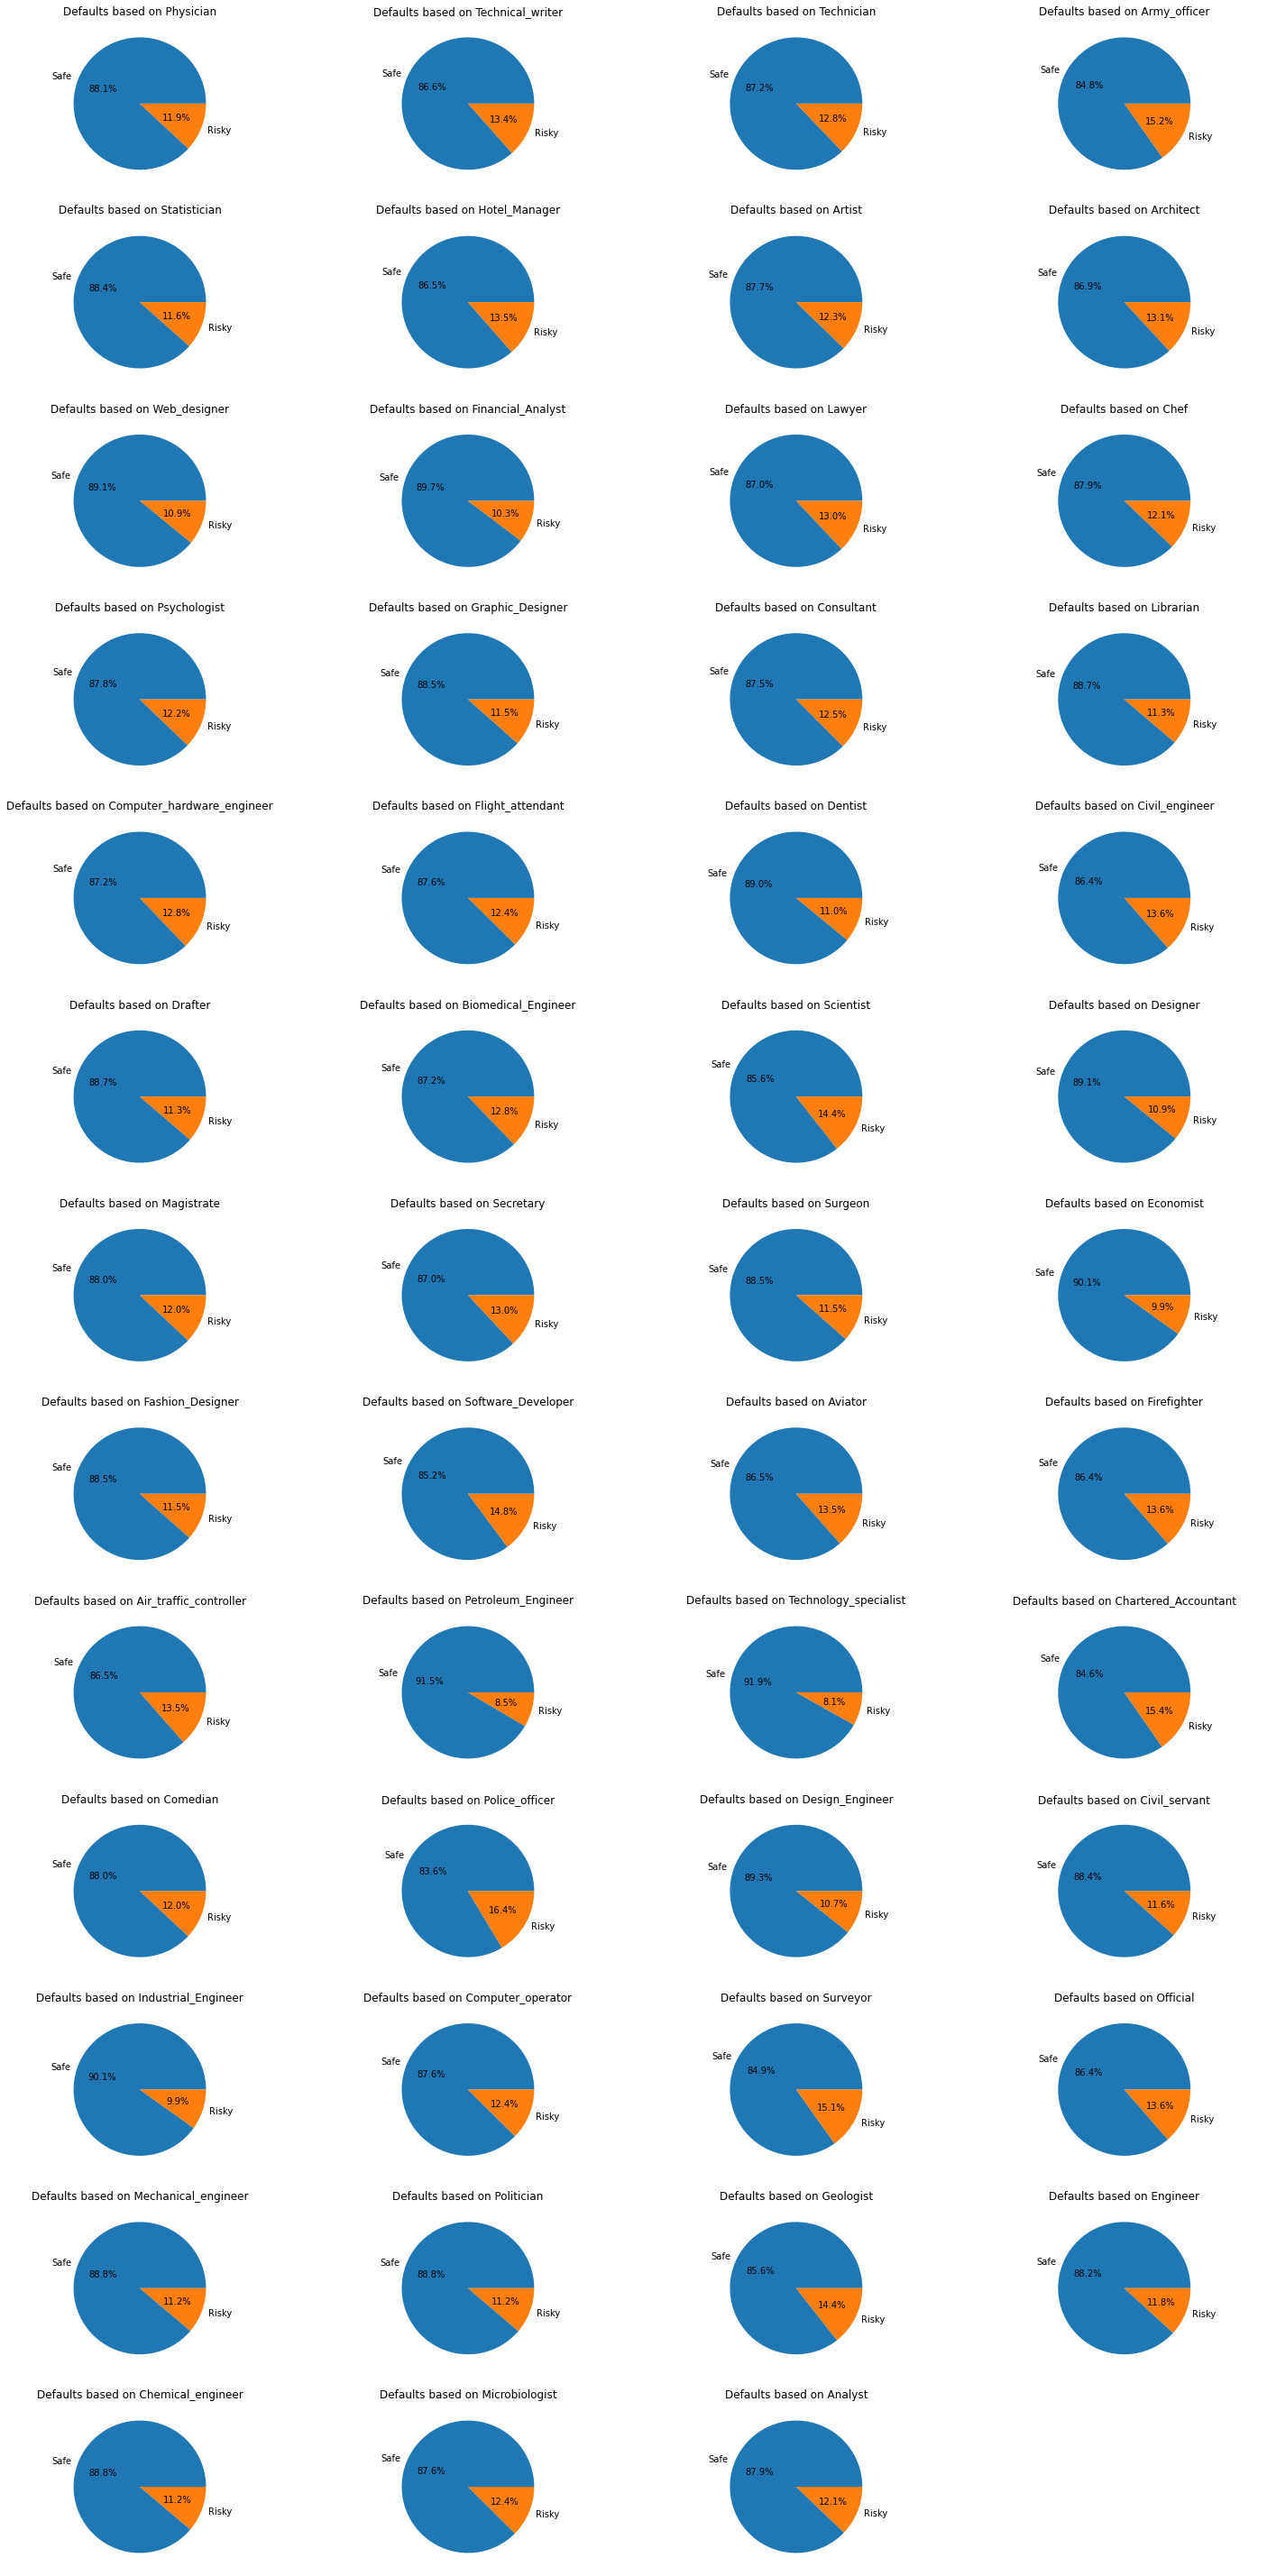

In [40]:
professions = list(train_data['Profession'].value_counts().index)
fig, ax = plt.subplots(13, 4, figsize=(25, 52))
ax_index = 0
for profession in professions:
    all_data = get_defaults(train_data, 'Profession', profession)
    plot_pie(all_data, flags[::-1], str(profession), ax, ax_index)
    ax_index += 1
_ = ax[-1, -1].axis('off')

#### Influence of State on Risk Factor

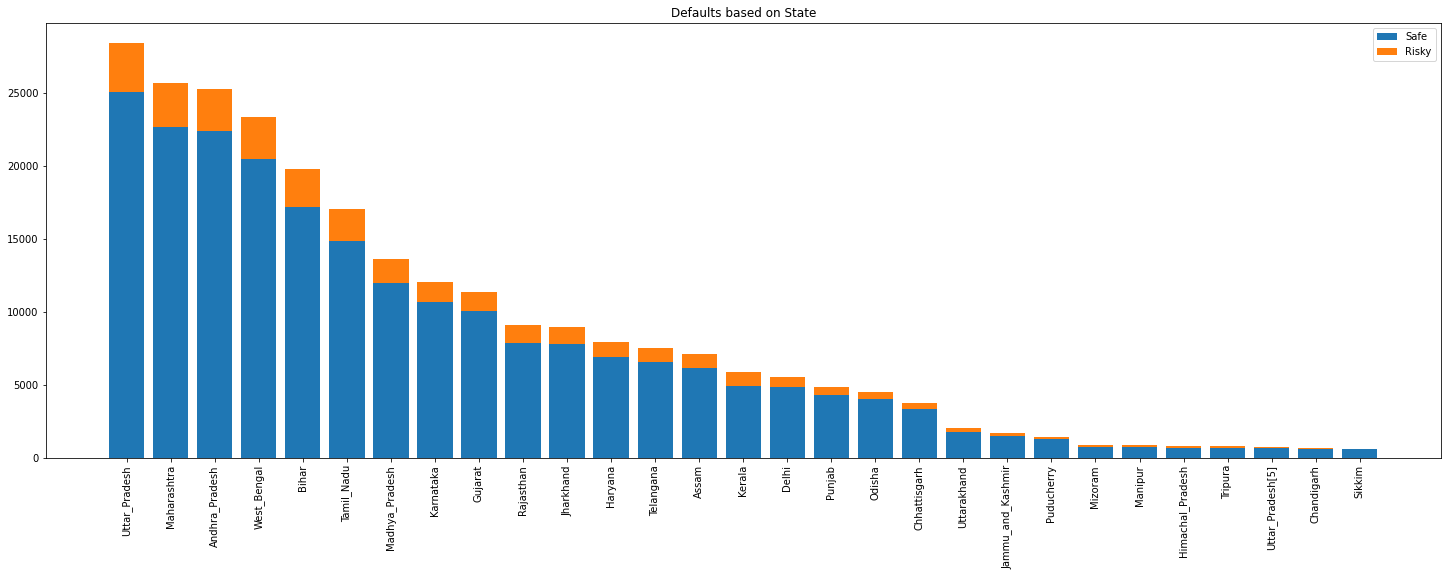

In [41]:
states = list(train_data['STATE'].value_counts().index)
fig, ax = plt.subplots(figsize=(25, 8))
ax.bar(states, risky_0['STATE'].value_counts())
ax.bar(states, risky_1['STATE'].value_counts(), bottom=risky_0['STATE'].value_counts())
plt.title("Defaults based on State")
plt.xticks(rotation=90)
_ = plt.legend(flags[::-1])

## Data Preprocessing

### Remove unwanted columns

In [42]:
train_data.drop('Id', axis=1, inplace=True)

### Encoding Categorical Columns

In [43]:
categorical_cols = [col for col in train_data.columns if train_data[col].dtype=="O"]

label_encoder = LabelEncoder()

for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [44]:
train_data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


In [45]:
train_data = train_data.drop_duplicates(subset=list(train_data.columns)[:-1])
train_data.shape

(42007, 12)

### Splitting Dataset into Training and Validation Set

In [46]:
X = train_data.drop('Risk_Flag', axis=1)
y = train_data['Risk_Flag']

In [47]:
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X.values, y)
X_train_over, X_val_over, y_train_over, y_val_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [48]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersampler.fit_resample(X.values, y)
X_train_under, X_val_under, y_train_under, y_val_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101, stratify=train_data['Risk_Flag'])

### Scaling Data Values in Training Set

In [50]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train_over = scaler.fit_transform(X_train_over)
X_val_over = scaler.transform(X_val_over)

X_train_under = scaler.fit_transform(X_train_under)
X_val_under = scaler.transform(X_val_under)

## Training Model

In [51]:
def model_apply(model, X_training, y_training, X_validation, y_validation, filename):
    model.fit(X_training, y_training)
    y_pred = model.predict(X_validation)
    
    print("Accuracy: {}".format(accuracy_score(y_validation, y_pred)))
    
    print("Classification Report: \n{}".format(classification_report(y_validation, y_pred)))
    
    conf_matrix = confusion_matrix(y_validation, y_pred)
    print("Confusion Matrix: ")
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    
    filename = "model/{}.pkl".format(filename)
    pickle.dump(model, open(filename, 'wb'))

In [52]:
logistic_regression = LogisticRegression(class_weight='balanced', penalty="l1", solver="liblinear")
decision_tree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', random_state=101)
random_forest = RandomForestClassifier(class_weight='balanced', random_state=101, n_estimators=100, criterion='gini')
neighbours = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

### Logistic Regression

On entire Data
Accuracy: 0.4900023803856225
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.48      0.60      6745
           1       0.20      0.52      0.29      1657

    accuracy                           0.49      8402
   macro avg       0.50      0.50      0.44      8402
weighted avg       0.68      0.49      0.54      8402

Confusion Matrix: 


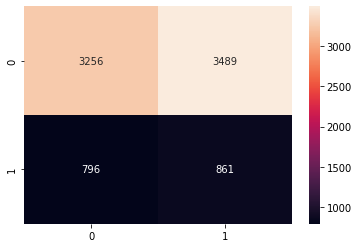

In [53]:
print("On entire Data")
model_apply(logistic_regression, X_train, y_train, X_val, y_val, 'LogisticRegression')

On Random Under Sample
Accuracy: 0.4939649969824985
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.40      0.44      1677
           1       0.49      0.59      0.54      1637

    accuracy                           0.49      3314
   macro avg       0.49      0.50      0.49      3314
weighted avg       0.49      0.49      0.49      3314

Confusion Matrix: 


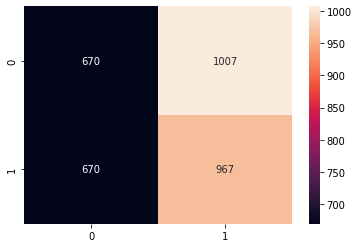

In [54]:
print("On Random Under Sample")
model_apply(logistic_regression, X_train_under, y_train_under, X_val_under, y_val_under, 'LogisticRegressionUnder')

On SMOTE Sample
Accuracy: 0.6044184150048187
Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.55      0.58      6761
           1       0.59      0.66      0.62      6728

    accuracy                           0.60     13489
   macro avg       0.61      0.60      0.60     13489
weighted avg       0.61      0.60      0.60     13489

Confusion Matrix: 


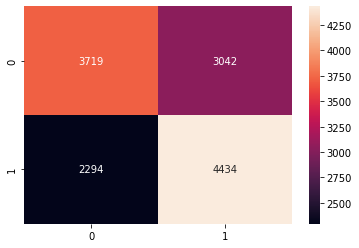

In [55]:
print("On SMOTE Sample")
model_apply(logistic_regression, X_train_over, y_train_over, X_val_over, y_val_over, 'LogisticRegressionOver')

### Decision Tree

On entire Data
Accuracy: 0.6854320399904784
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      6745
           1       0.19      0.19      0.19      1657

    accuracy                           0.69      8402
   macro avg       0.50      0.50      0.50      8402
weighted avg       0.68      0.69      0.68      8402

Confusion Matrix: 


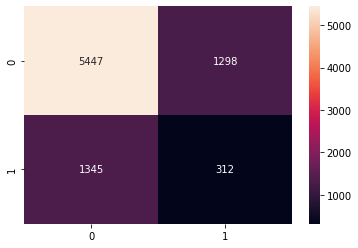

In [56]:
print("On entire Data")
model_apply(decision_tree, X_train, y_train, X_val, y_val, 'DecisionTree')

On Random Under Sample
Accuracy: 0.4927579963789982
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1677
           1       0.49      0.50      0.49      1637

    accuracy                           0.49      3314
   macro avg       0.49      0.49      0.49      3314
weighted avg       0.49      0.49      0.49      3314

Confusion Matrix: 


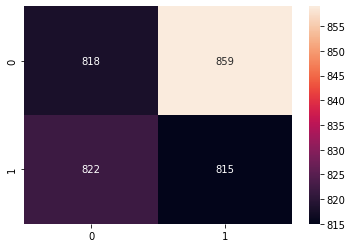

In [57]:
print("On Random Under Sample")
model_apply(decision_tree, X_train_under, y_train_under, X_val_under, y_val_under, 'DecisionTreeUnder')

On SMOTE Sample
Accuracy: 0.7175476314033657
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      6761
           1       0.71      0.73      0.72      6728

    accuracy                           0.72     13489
   macro avg       0.72      0.72      0.72     13489
weighted avg       0.72      0.72      0.72     13489

Confusion Matrix: 


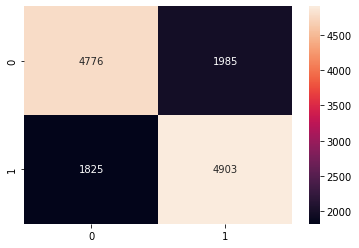

In [58]:
print("On SMOTE Sample")
model_apply(decision_tree, X_train_over, y_train_over, X_val_over, y_val_over, 'DecisionTreeOver')

### Random Forest

On entire Data
Accuracy: 0.8026660318971673
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6745
           1       0.00      0.00      0.00      1657

    accuracy                           0.80      8402
   macro avg       0.40      0.50      0.45      8402
weighted avg       0.64      0.80      0.71      8402

Confusion Matrix: 


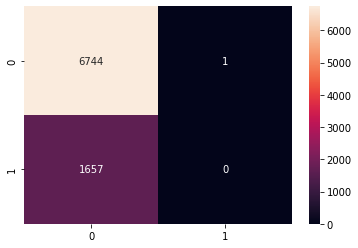

In [59]:
print("On entire Data")
model_apply(random_forest, X_train, y_train, X_val, y_val, 'RandomForest')

On Random Under Sample
Accuracy: 0.4945684972842486
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1677
           1       0.49      0.49      0.49      1637

    accuracy                           0.49      3314
   macro avg       0.49      0.49      0.49      3314
weighted avg       0.49      0.49      0.49      3314

Confusion Matrix: 


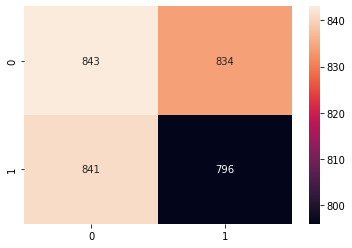

In [60]:
print("On Random Under Sample")
model_apply(random_forest, X_train_under, y_train_under, X_val_under, y_val_under, 'RandomForestUnder')

On SMOTE Sample
Accuracy: 0.7665505226480837
Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      6761
           1       0.79      0.73      0.76      6728

    accuracy                           0.77     13489
   macro avg       0.77      0.77      0.77     13489
weighted avg       0.77      0.77      0.77     13489

Confusion Matrix: 


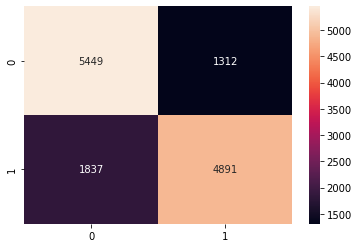

In [61]:
print("On SMOTE Sample")
model_apply(random_forest, X_train_over, y_train_over, X_val_over, y_val_over, 'RandomForestOver')

### Nearest Neighbours

On entire Data
Accuracy: 0.7688645560580815
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      6745
           1       0.19      0.05      0.08      1657

    accuracy                           0.77      8402
   macro avg       0.50      0.50      0.48      8402
weighted avg       0.68      0.77      0.71      8402

Confusion Matrix: 


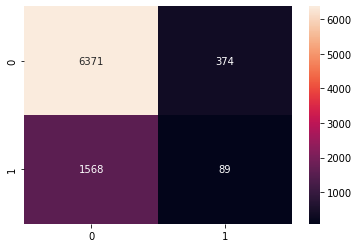

In [62]:
print("On entire Data")
model_apply(neighbours, X_train, y_train, X_val, y_val, 'KNeighbors')

On Random Under Sample
Accuracy: 0.4939649969824985
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1677
           1       0.49      0.50      0.49      1637

    accuracy                           0.49      3314
   macro avg       0.49      0.49      0.49      3314
weighted avg       0.49      0.49      0.49      3314

Confusion Matrix: 


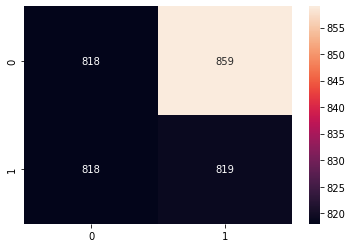

In [63]:
print("On Random Under Sample")
model_apply(neighbours, X_train_under, y_train_under, X_val_under, y_val_under, 'KNeighborsUnder')

On SMOTE Sample
Accuracy: 0.6706946400770999
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      6761
           1       0.64      0.76      0.70      6728

    accuracy                           0.67     13489
   macro avg       0.68      0.67      0.67     13489
weighted avg       0.68      0.67      0.67     13489

Confusion Matrix: 


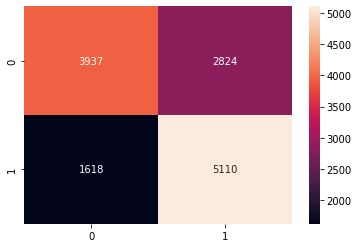

In [64]:
print("On SMOTE Sample")
model_apply(neighbours, X_train_over, y_train_over, X_val_over, y_val_over, 'KNeighborsOver')

### Neural Networks

In [65]:
def train_neural_networks(model, X_training, y_training, X_validation, y_validation, learning_rate=0.1, epochs=50, batch_size=100):
  Adam(learning_rate=learning_rate)
  model.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=[metrics.Recall(), metrics.Precision()]
  )
  return model.fit(X_training, y_training, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size)

In [66]:
def show_and_save_model(model, name, X_validation, y_validation):
  y_pred = model.predict(X_validation) > 0.5

  print("Accuracy: {}".format(accuracy_score(y_validation, y_pred)))

  print("Classification Report: \n{}".format(classification_report(y_validation, y_pred)))

  conf_matrix = confusion_matrix(y_validation, y_pred)
  print("Confusion Matrix: ")
  sns.heatmap(conf_matrix, annot=True, fmt='d')

  filename = "model/{}.pkl".format(name)
  pickle.dump(model, open(filename, 'wb'))

In [67]:
neg_under, pos_under = np.bincount(y_train_under)

In [68]:
neg_over, pos_over = np.bincount(y_train_over)

In [69]:
initial_bias_under = np.log([pos_under/neg_under])
initial_bias_under

array([0.00603502])

In [70]:
initial_bias_over = np.log([pos_over/neg_over])
initial_bias_over

array([0.00122324])

#### On Random Under Sample

In [71]:
model = Sequential()

model.add(Dense(128, input_shape=(11,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid', bias_initializer=Constant(initial_bias_under)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26,369
Trainable params: 26,369
Non-trainable params: 0
_________________________________________________________________


In [72]:
hist_us = train_neural_networks(model, X_train_under, y_train_under, X_val_under, y_val_under, learning_rate=0.1, batch_size=15, epochs=25)

Epoch 1/25
884/884 [==============================] - 5s 4ms/step - loss: 0.6969 - recall: 0.5224 - precision: 0.5038 - val_loss: 0.6947 - val_recall: 0.5834 - val_precision: 0.4867
Epoch 2/25
884/884 [==============================] - 3s 4ms/step - loss: 0.6945 - recall: 0.5161 - precision: 0.5042 - val_loss: 0.6944 - val_recall: 0.8986 - val_precision: 0.4935
Epoch 3/25
884/884 [==============================] - 3s 3ms/step - loss: 0.6933 - recall: 0.5800 - precision: 0.5117 - val_loss: 0.6940 - val_recall: 0.7813 - val_precision: 0.4910
Epoch 4/25
884/884 [==============================] - 3s 4ms/step - loss: 0.6931 - recall: 0.6139 - precision: 0.5124 - val_loss: 0.6935 - val_recall: 0.5082 - val_precision: 0.4909
Epoch 5/25
884/884 [==============================] - 3s 4ms/step - loss: 0.6929 - recall: 0.5623 - precision: 0.5116 - val_loss: 0.6945 - val_recall: 0.6689 - val_precision: 0.4884
Epoch 6/25
884/884 [==============================] - 3s 3ms/step - loss: 0.6918 - recall:

104/104 [==============================] - 0s 2ms/step
Accuracy: 0.48974049487024746
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1677
           1       0.48      0.43      0.46      1637

    accuracy                           0.49      3314
   macro avg       0.49      0.49      0.49      3314
weighted avg       0.49      0.49      0.49      3314

Confusion Matrix: 


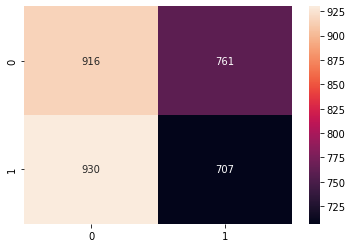

In [73]:
show_and_save_model(model, 'TwoLayerBiasUnder', X_val_under, y_val_under)

#### On SMOTE Sample

In [83]:
model = Sequential()

model.add(Dense(256, input_shape=(11,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid', bias_initializer=Constant(initial_bias_over)))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               3072      
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 1)                

In [84]:
hist_os = train_neural_networks(model, X_train_over, y_train_over, X_val_over, y_val_over, learning_rate=0.1, batch_size=50, epochs=50)

Epoch 1/50
1080/1080 [==============================] - 9s 7ms/step - loss: 0.6499 - recall_6: 0.5895 - precision_6: 0.6339 - val_loss: 0.6247 - val_recall_6: 0.7032 - val_precision_6: 0.6413
Epoch 2/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.6249 - recall_6: 0.5902 - precision_6: 0.6762 - val_loss: 0.6113 - val_recall_6: 0.6668 - val_precision_6: 0.6744
Epoch 3/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.6179 - recall_6: 0.5994 - precision_6: 0.6848 - val_loss: 0.6071 - val_recall_6: 0.5806 - val_precision_6: 0.7052
Epoch 4/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.6125 - recall_6: 0.6100 - precision_6: 0.6906 - val_loss: 0.6038 - val_recall_6: 0.5611 - val_precision_6: 0.7237
Epoch 5/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.6103 - recall_6: 0.6091 - precision_6: 0.6912 - val_loss: 0.6078 - val_recall_6: 0.7127 - val_precision_6: 0.6629
Epoch 6/50
1080/1080 [==================

In [86]:
hist_os = train_neural_networks(model, X_train_over, y_train_over, X_val_over, y_val_over, learning_rate=0.1, batch_size=50, epochs=50)

Epoch 1/50
1080/1080 [==============================] - 9s 7ms/step - loss: 0.5846 - recall_7: 0.6494 - precision_7: 0.7097 - val_loss: 0.5856 - val_recall_7: 0.6908 - val_precision_7: 0.6949
Epoch 2/50
1080/1080 [==============================] - 7s 6ms/step - loss: 0.5864 - recall_7: 0.6472 - precision_7: 0.7104 - val_loss: 0.5844 - val_recall_7: 0.6874 - val_precision_7: 0.6922
Epoch 3/50
1080/1080 [==============================] - 7s 7ms/step - loss: 0.5848 - recall_7: 0.6501 - precision_7: 0.7097 - val_loss: 0.5855 - val_recall_7: 0.6969 - val_precision_7: 0.6915
Epoch 4/50
1080/1080 [==============================] - 7s 6ms/step - loss: 0.5835 - recall_7: 0.6506 - precision_7: 0.7125 - val_loss: 0.5867 - val_recall_7: 0.7041 - val_precision_7: 0.6892
Epoch 5/50
1080/1080 [==============================] - 7s 6ms/step - loss: 0.5845 - recall_7: 0.6505 - precision_7: 0.7105 - val_loss: 0.5850 - val_recall_7: 0.6956 - val_precision_7: 0.6923
Epoch 6/50
1080/1080 [==================

422/422 [==============================] - 1s 2ms/step
Accuracy: 0.6959003632589518
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      6761
           1       0.69      0.72      0.70      6728

    accuracy                           0.70     13489
   macro avg       0.70      0.70      0.70     13489
weighted avg       0.70      0.70      0.70     13489

Confusion Matrix: 


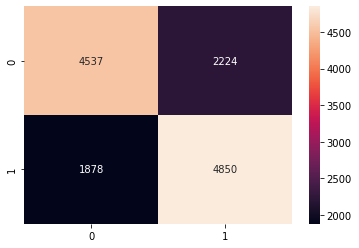

In [87]:
show_and_save_model(model, 'TwoLayerBiasOver', X_val_over, y_val_over)

## Prediction on Test Model

In [101]:
test_data.drop('ID', axis=1, inplace=True)

In [102]:
categorical_cols = [col for col in test_data.columns if test_data[col].dtype=="O"]

label_encoder = LabelEncoder()

for col in categorical_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [103]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             28000 non-null  int64
 1   Age                28000 non-null  int64
 2   Experience         28000 non-null  int64
 3   Married/Single     28000 non-null  int64
 4   House_Ownership    28000 non-null  int64
 5   Car_Ownership      28000 non-null  int64
 6   Profession         28000 non-null  int64
 7   CITY               28000 non-null  int64
 8   STATE              28000 non-null  int64
 9   CURRENT_JOB_YRS    28000 non-null  int64
 10  CURRENT_HOUSE_YRS  28000 non-null  int64
dtypes: int64(11)
memory usage: 2.3 MB


In [104]:
cols = test_data.columns

In [105]:
test_data = scaler.transform(test_data.to_numpy())
test_data = pd.DataFrame(test_data, columns=list(cols))
test_data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.837459,0.531939,1.506277,0.332830,0.283607,-0.658560,0.078051,0.254007,1.521777,-0.616080,0.700643
1,-1.312342,-1.460938,-0.811160,0.332830,0.283607,-0.658560,-0.057943,-0.294540,0.017107,-0.343746,-1.419197
2,1.362288,0.004413,0.347558,0.332830,0.283607,-0.658560,0.350040,1.449840,0.017107,0.745591,1.407256
3,-1.058526,-0.054201,-0.149036,-3.004535,0.283607,1.518465,-1.621878,0.144297,0.017107,-0.888414,-0.005970
4,-1.730457,-1.460938,1.340745,0.332830,0.283607,1.518465,-0.873909,-1.303868,1.521777,1.834927,-0.712583
...,...,...,...,...,...,...,...,...,...,...,...
27995,1.729099,0.414711,0.513089,0.332830,0.283607,-0.658560,1.302000,-0.744349,-1.487563,-0.343746,-1.419197
27996,-0.719829,-0.171429,-0.149036,0.332830,0.283607,-0.658560,1.505992,1.000031,-0.090369,0.745591,1.407256
27997,1.077325,-1.519552,-0.811160,0.332830,0.283607,-0.658560,0.350040,0.352745,0.017107,-0.616080,0.700643
27998,1.561620,0.063027,0.513089,0.332830,0.283607,1.518465,-1.213895,-1.216100,-1.057657,1.834927,1.407256


In [106]:
def load_and_test(filename):
  model = pickle.load(open(filename, 'rb'))
  y_pred = model.predict(test_data.iloc[:, : 11])
  return y_pred

### Logistic Regression

In [107]:
test_data['lr_predict'] = list(load_and_test('model/LogisticRegressionOver.pkl'))
test_data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,lr_predict
0,0.837459,0.531939,1.506277,0.332830,0.283607,-0.658560,0.078051,0.254007,1.521777,-0.616080,0.700643,0
1,-1.312342,-1.460938,-0.811160,0.332830,0.283607,-0.658560,-0.057943,-0.294540,0.017107,-0.343746,-1.419197,1
2,1.362288,0.004413,0.347558,0.332830,0.283607,-0.658560,0.350040,1.449840,0.017107,0.745591,1.407256,0
3,-1.058526,-0.054201,-0.149036,-3.004535,0.283607,1.518465,-1.621878,0.144297,0.017107,-0.888414,-0.005970,0
4,-1.730457,-1.460938,1.340745,0.332830,0.283607,1.518465,-0.873909,-1.303868,1.521777,1.834927,-0.712583,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1.729099,0.414711,0.513089,0.332830,0.283607,-0.658560,1.302000,-0.744349,-1.487563,-0.343746,-1.419197,1
27996,-0.719829,-0.171429,-0.149036,0.332830,0.283607,-0.658560,1.505992,1.000031,-0.090369,0.745591,1.407256,0
27997,1.077325,-1.519552,-0.811160,0.332830,0.283607,-0.658560,0.350040,0.352745,0.017107,-0.616080,0.700643,1
27998,1.561620,0.063027,0.513089,0.332830,0.283607,1.518465,-1.213895,-1.216100,-1.057657,1.834927,1.407256,0


In [108]:
test_data['lr_predict'].value_counts()

1    14850
0    13150
Name: lr_predict, dtype: int64

### Decision Tree

In [110]:
test_data['dt_predict'] = list(load_and_test('model/DecisionTreeOver.pkl'))
test_data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,lr_predict,dt_predict
0,0.837459,0.531939,1.506277,0.332830,0.283607,-0.658560,0.078051,0.254007,1.521777,-0.616080,0.700643,0,1
1,-1.312342,-1.460938,-0.811160,0.332830,0.283607,-0.658560,-0.057943,-0.294540,0.017107,-0.343746,-1.419197,1,1
2,1.362288,0.004413,0.347558,0.332830,0.283607,-0.658560,0.350040,1.449840,0.017107,0.745591,1.407256,0,1
3,-1.058526,-0.054201,-0.149036,-3.004535,0.283607,1.518465,-1.621878,0.144297,0.017107,-0.888414,-0.005970,0,0
4,-1.730457,-1.460938,1.340745,0.332830,0.283607,1.518465,-0.873909,-1.303868,1.521777,1.834927,-0.712583,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1.729099,0.414711,0.513089,0.332830,0.283607,-0.658560,1.302000,-0.744349,-1.487563,-0.343746,-1.419197,1,1
27996,-0.719829,-0.171429,-0.149036,0.332830,0.283607,-0.658560,1.505992,1.000031,-0.090369,0.745591,1.407256,0,1
27997,1.077325,-1.519552,-0.811160,0.332830,0.283607,-0.658560,0.350040,0.352745,0.017107,-0.616080,0.700643,1,0
27998,1.561620,0.063027,0.513089,0.332830,0.283607,1.518465,-1.213895,-1.216100,-1.057657,1.834927,1.407256,0,1


In [111]:
test_data['dt_predict'].value_counts()

1    16859
0    11141
Name: dt_predict, dtype: int64

### Random Forest

In [113]:
test_data['rf_predict'] = list(load_and_test('model/RandomForestOver.pkl'))
test_data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,lr_predict,dt_predict,rf_predict
0,0.837459,0.531939,1.506277,0.332830,0.283607,-0.658560,0.078051,0.254007,1.521777,-0.616080,0.700643,0,1,1
1,-1.312342,-1.460938,-0.811160,0.332830,0.283607,-0.658560,-0.057943,-0.294540,0.017107,-0.343746,-1.419197,1,1,1
2,1.362288,0.004413,0.347558,0.332830,0.283607,-0.658560,0.350040,1.449840,0.017107,0.745591,1.407256,0,1,0
3,-1.058526,-0.054201,-0.149036,-3.004535,0.283607,1.518465,-1.621878,0.144297,0.017107,-0.888414,-0.005970,0,0,0
4,-1.730457,-1.460938,1.340745,0.332830,0.283607,1.518465,-0.873909,-1.303868,1.521777,1.834927,-0.712583,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1.729099,0.414711,0.513089,0.332830,0.283607,-0.658560,1.302000,-0.744349,-1.487563,-0.343746,-1.419197,1,1,1
27996,-0.719829,-0.171429,-0.149036,0.332830,0.283607,-0.658560,1.505992,1.000031,-0.090369,0.745591,1.407256,0,1,0
27997,1.077325,-1.519552,-0.811160,0.332830,0.283607,-0.658560,0.350040,0.352745,0.017107,-0.616080,0.700643,1,0,0
27998,1.561620,0.063027,0.513089,0.332830,0.283607,1.518465,-1.213895,-1.216100,-1.057657,1.834927,1.407256,0,1,0


In [114]:
test_data['rf_predict'].value_counts()

0    15453
1    12547
Name: rf_predict, dtype: int64

### K Nearest Neighbours

In [115]:
test_data['knn_predict'] = list(load_and_test('model/KNeighborsOver.pkl'))
test_data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,lr_predict,dt_predict,rf_predict,knn_predict
0,0.837459,0.531939,1.506277,0.332830,0.283607,-0.658560,0.078051,0.254007,1.521777,-0.616080,0.700643,0,1,1,0
1,-1.312342,-1.460938,-0.811160,0.332830,0.283607,-0.658560,-0.057943,-0.294540,0.017107,-0.343746,-1.419197,1,1,1,1
2,1.362288,0.004413,0.347558,0.332830,0.283607,-0.658560,0.350040,1.449840,0.017107,0.745591,1.407256,0,1,0,0
3,-1.058526,-0.054201,-0.149036,-3.004535,0.283607,1.518465,-1.621878,0.144297,0.017107,-0.888414,-0.005970,0,0,0,1
4,-1.730457,-1.460938,1.340745,0.332830,0.283607,1.518465,-0.873909,-1.303868,1.521777,1.834927,-0.712583,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1.729099,0.414711,0.513089,0.332830,0.283607,-0.658560,1.302000,-0.744349,-1.487563,-0.343746,-1.419197,1,1,1,1
27996,-0.719829,-0.171429,-0.149036,0.332830,0.283607,-0.658560,1.505992,1.000031,-0.090369,0.745591,1.407256,0,1,0,0
27997,1.077325,-1.519552,-0.811160,0.332830,0.283607,-0.658560,0.350040,0.352745,0.017107,-0.616080,0.700643,1,0,0,1
27998,1.561620,0.063027,0.513089,0.332830,0.283607,1.518465,-1.213895,-1.216100,-1.057657,1.834927,1.407256,0,1,0,0


In [116]:
test_data['knn_predict'].value_counts()

0    15955
1    12045
Name: knn_predict, dtype: int64

### Two Layer with Bias Network

In [117]:
test_data['b_predict'] = [1 if item else 0 for sublist in list(load_and_test('model/TwoLayerBiasOver.pkl') > 0.5) for item in sublist]
test_data

875/875 [==============================] - 2s 2ms/step


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,lr_predict,dt_predict,rf_predict,knn_predict,b_predict
0,0.837459,0.531939,1.506277,0.332830,0.283607,-0.658560,0.078051,0.254007,1.521777,-0.616080,0.700643,0,1,1,0,1
1,-1.312342,-1.460938,-0.811160,0.332830,0.283607,-0.658560,-0.057943,-0.294540,0.017107,-0.343746,-1.419197,1,1,1,1,1
2,1.362288,0.004413,0.347558,0.332830,0.283607,-0.658560,0.350040,1.449840,0.017107,0.745591,1.407256,0,1,0,0,1
3,-1.058526,-0.054201,-0.149036,-3.004535,0.283607,1.518465,-1.621878,0.144297,0.017107,-0.888414,-0.005970,0,0,0,1,1
4,-1.730457,-1.460938,1.340745,0.332830,0.283607,1.518465,-0.873909,-1.303868,1.521777,1.834927,-0.712583,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1.729099,0.414711,0.513089,0.332830,0.283607,-0.658560,1.302000,-0.744349,-1.487563,-0.343746,-1.419197,1,1,1,1,1
27996,-0.719829,-0.171429,-0.149036,0.332830,0.283607,-0.658560,1.505992,1.000031,-0.090369,0.745591,1.407256,0,1,0,0,0
27997,1.077325,-1.519552,-0.811160,0.332830,0.283607,-0.658560,0.350040,0.352745,0.017107,-0.616080,0.700643,1,0,0,1,1
27998,1.561620,0.063027,0.513089,0.332830,0.283607,1.518465,-1.213895,-1.216100,-1.057657,1.834927,1.407256,0,1,0,0,0


In [118]:
test_data['b_predict'].value_counts()

1    14700
0    13300
Name: b_predict, dtype: int64

## Saving Output Dataset

In [119]:
predicted_data = pd.DataFrame({
    'Id': list(test_data.index + 1)
})

In [120]:
predicted_data = pd.concat([predicted_data, test_data.iloc[:, 11:]], axis=1)
predicted_data

,Id,lr_predict,dt_predict,rf_predict,knn_predict,b_predict
0,1,0,1,1,0,1
1,2,1,1,1,1,1
2,3,0,1,0,0,1
3,4,0,0,0,1,1
4,5,0,1,0,0,0
...,...,...,...,...,...,...
27995,27996,1,1,1,1,1
27996,27997,0,1,0,0,0
27997,27998,1,0,0,1,1
27998,27999,0,1,0,0,0


In [121]:
predicted_data.to_csv('data/Prediction on Test.csv')